<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema2_Informe2_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de la relación entre variación del PIB y muertes por COVID19 en los países de la OCDE

Fecha del informe: 17/10/2021.

Autor: Daniel Oto Peralías.

In [ ]:
# Importar librerías 
import pandas as pd
pd.set_option('display.max_row', 40)
pd.set_option('display.max_columns', 10)
import matplotlib.pyplot as plt

In [ ]:
# Subir datos del PIB
from google.colab import files
files.upload()

In [ ]:
# Leer datos de la variación del PIB
pib=pd.read_excel('Datos_OECD.xlsx','datos')
pib=pib[["Country","2020"]]

In [ ]:
pib.set_index("Country",inplace=True)

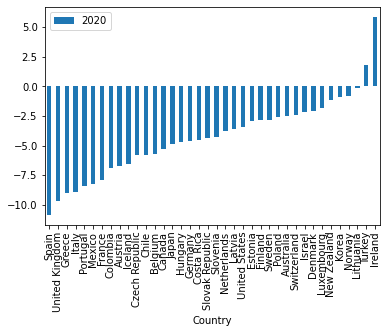

In [ ]:
# Crear gráfico de barras
pib.sort_values('2020', inplace=True) # Idem
pib.plot.bar()

In [ ]:
# Crear lista de países de la OCDE para luego seleccionarlos en OWID
paises=pib.index.to_list()

In [ ]:
# Opción 1: Importar datos de OWID de COVID19 (LEYÉNDOLOS DIRECTAMENTE)
datapath="https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/owid_covid.xlsx"
covid=pd.read_excel(datapath,index_col=0,parse_dates=True)

In [ ]:
# Opción 2: 2.1 Subir datos
files.upload()

In [ ]:
# Opción 2: 2.2 Leer datos
covid=pd.read_excel("/content/owid_covid.xlsx",index_col=0,parse_dates=True)

In [ ]:
# Seleccionamos periodo relevante: 31/12/2020
cov=covid.loc["2020-12-31",:].copy() # Usamos función copy para crear un objeto independiente

In [ ]:
# Seleccionamos los países
cov['ocde']=0
for x in paises:
  cov.loc[cov['location']==x,'ocde']=1

In [ ]:
# Para ver si tengo los 38 países (compruebo que no)
len(cov.loc[cov['ocde']==1])

35

In [ ]:
# Para ver los países que faltan
paises_identif=cov.loc[cov['ocde']==1,'location'].unique()
for x in paises:
    if x not in paises_identif:
        print(x)

Czech Republic
Slovak Republic
Korea


In [ ]:
# Cambiar nombre en tabla cov
cov.loc[cov['location']=="South Korea","location"]='Korea'
cov.loc[cov['location']=='Czechia',"location"]='Czech Republic'
cov.loc[cov['location']=='Slovakia',"location"]='Slovak Republic'

In [ ]:
# Volver a seleccionar los países de la OCDE
cov['ocde']=0
for x in paises:
  cov.loc[cov['location']==x,'ocde']=1
len(cov.loc[cov['ocde']==1]) # Bien! Ahora están los 38

38

In [ ]:
# Ahora seleccionamos la muestra de países de la OCDE
cov=cov.loc[cov['ocde']==1]

In [ ]:
cov=cov.loc["2020-12-31"]

In [ ]:
cov.set_index("location", inplace=True)

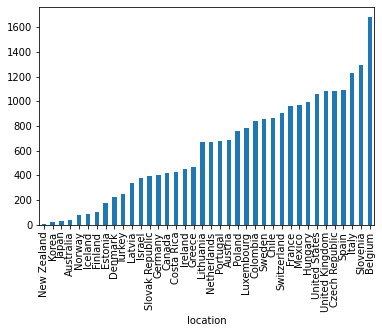

In [ ]:
# Gráfico exploratorio de barras
cov.sort_values("total_deaths_per_million").total_deaths_per_million.plot.bar()

In [ ]:
pib.reset_index(inplace=True)
cov.reset_index(inplace=True)
cov.rename(columns={"location":"Country"},inplace=True)

In [ ]:
union=pib.merge(cov,on="Country")

In [ ]:
#Seleccionamos columnas relevantes
union=union[["Country","2020","continent","total_deaths_per_million"]]
union

### Correlación entre crecimiento del PIB y tasa de muertes por COVID-19 en 2020

In [ ]:
cc=union.corr().iloc[1,0] # Esto es para seleccionar una celda específica con el coef. corr.

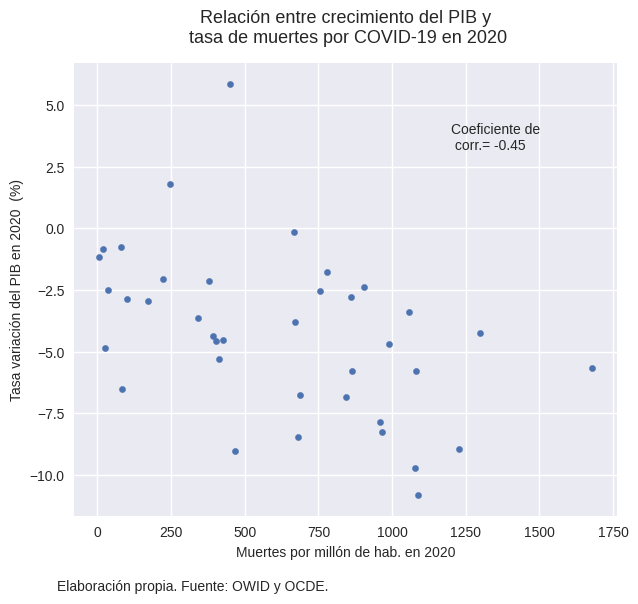

In [ ]:
# Gráfico de calidad:
plt.style.use('seaborn')
fig, ax=plt.subplots(figsize=(7,6),dpi=100)
union.plot.scatter(x="total_deaths_per_million", y="2020", ax=ax)
ax.set_ylabel("Tasa variación del PIB en 2020  (%)",size=10)
ax.set_xlabel("Muertes por millón de hab. en 2020",size=10)
ax.set_title("Relación entre crecimiento del PIB y\n tasa de muertes por COVID-19 en 2020",
             size=13,pad=15)
ax.text(1200,3.2,"Coeficiente de\n corr.= "+str(round(cc,2)), ha="left",fontsize=10 ) 
fig.text(0.1,0.0,"Elaboración propia. Fuente: OWID y OCDE.", ha="left",fontsize=10 ) 
plt.show()

In [ ]:
europa=union[union.continent=="Europe"].copy()

In [ ]:
cc_e=europa.corr().iloc[1,0]

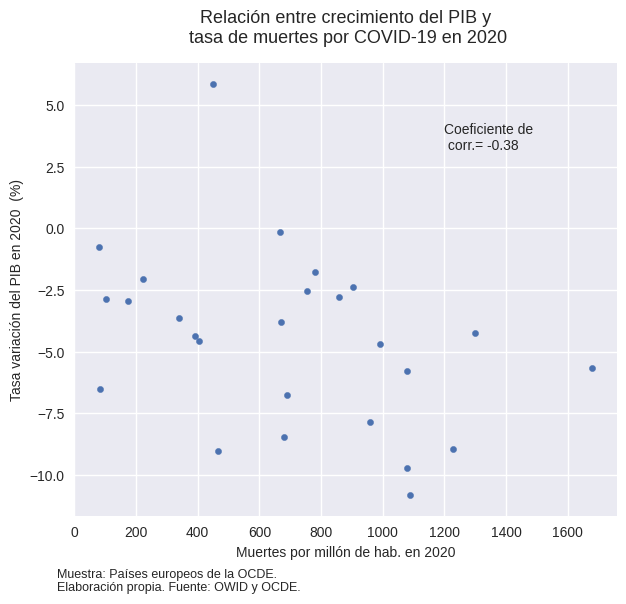

In [ ]:
# Gráfico de calidad:
plt.style.use('seaborn')
fig, ax=plt.subplots(figsize=(7,6),dpi=100)
europa.plot.scatter(x="total_deaths_per_million", y="2020", ax=ax)
ax.set_ylabel("Tasa variación del PIB en 2020  (%)",size=10)
ax.set_xlabel("Muertes por millón de hab. en 2020",size=10)
ax.set_title("Relación entre crecimiento del PIB y\n tasa de muertes por COVID-19 en 2020",
             size=13,pad=15)
ax.text(1200,3.2,"Coeficiente de\n corr.= "+str(round(cc_e,2)), ha="left",fontsize=10 ) 
fig.text(0.1,0.0,"Muestra: Países europeos de la OCDE.\nElaboración propia. Fuente: OWID y OCDE.", ha="left",fontsize=9 ) 
plt.show()